In [2]:
import sqlite3
import pandas as pd

In [3]:
# creating file path
dbfile = 'olist.db'
# Create a SQL connection to our SQLite database
con = sqlite3.connect(dbfile)

# creating cursor
cur = con.cursor()

# reading all table names
data = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is you table list
print(data)

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


In [18]:
data_daerah = pd.read_sql_query('SELECT * FROM olist_geolocation_dataset', con)
data_cust = pd.read_sql_query('SELECT * FROM olist_order_customer_dataset', con)
data_order = pd.read_sql_query('SELECT * FROM olist_order_dataset', con)
data_bayar = pd.read_sql_query('SELECT * FROM olist_order_payments_dataset', con)
data_item = pd.read_sql_query('SELECT * FROM olist_order_items_dataset', con)
data_review = pd.read_sql_query('SELECT * FROM olist_order_reviews_dataset', con)
data_produk = pd.read_sql_query('SELECT * FROM olist_products_dataset', con)
data_penjual = pd.read_sql_query('SELECT * FROM olist_sellers_dataset', con)
data_terjemah = pd.read_sql_query('SELECT * FROM product_category_name_translation', con)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [194]:
data1 = pd.read_csv('data1.csv') #memenuhi objektif 1: barang terbanyak yang dijual
data2 = pd.read_csv('data2.csv') #memenuhi objektif kedua, melihat segmentasi barang berdasarkan kota pembeli
data3 = pd.read_csv('data3.csv') #memenuhi objektif ketiga, melihat segmentasi barang berdasarkan kota pembeli
data4 = pd.read_csv('data4.csv') #memenuhi objektif ketiga, melihat korelasi waktu proses pembelian barang dengan rating review


# MISSING VALUE

In [138]:
#data 4 

data4.isna().sum()
data4.dropna(inplace=True)
data4.isna().sum()

waktu          0
rerata_skor    0
dtype: int64

In [176]:
#data 2

data2.isna().sum()

customer_city       0
product_name        0
jumlah_pembelian    0
dtype: int64

In [10]:
data1.dropna(inplace=True)
data1.isna().sum()


product_name        0
jumlah_pembelian    0
dtype: int64

Pengolahan data2 untuk memperoleh data bersih yang siap divisualisasikan dan diintepretasikan

In [174]:
#membuat pivot table antara kota dan nama barang sebagai index dan kolom, dan jumlah pembelian sebagai values
data2_pivot = data2.pivot_table(values='jumlah_pembelian', index='customer_city', columns='product_name', aggfunc='sum', fill_value=0) #fill_value untuk nilai NaN, margin untuk menampilkan all

#melakukan for loop untuk memperoleh data tiap barang dengan penjualan tertinggi terdapat di kota apa saja
kota = []
barang = []
nilai = []
for i in data2_pivot.columns:
    data2_final = data2_pivot.loc[data2_pivot[f'{i}'] == data2_pivot[f'{i}'].max(), f'{i}']
    kota.append(data2_final.index[0])
    barang.append(i)
    nilai.append(data2_final[0])

#pembuatan data baru yang terdiri dari kota tempat suatu barang terbanyak dibeli 
rekap_segmentasi = pd.DataFrame({'kota': kota,
                   'barang': barang,
                   'jumlah': nilai})

#rekap lebih lanjut, merangkum dalam tiap kota terdapat berapa barang yang terjual paling banyak di kota tersebut
rekap_segmentasi['kota'].value_counts()


sao paulo         62
rio de janeiro     5
diadema            1
itapeva            1
parauapebas        1
brasilia           1
Name: kota, dtype: int64

In [197]:
#handle missing value data baru

rekap_segmentasi.isna().sum()

kota      0
barang    0
jumlah    0
dtype: int64

In [67]:
data2_pivot.dropna(inplace=True)
data2_pivot.isna().sum()
data2_pivot.max()
data2_pivot.index

Index(['abadia dos dourados', 'abadiania', 'abaete', 'abaetetuba', 'abaiara',
       'abaira', 'abare', 'abatia', 'abdon batista', 'abelardo luz',
       ...
       'xanxere', 'xapuri', 'xavantina', 'xaxim', 'xexeu', 'xinguara',
       'xique-xique', 'zacarias', 'ze doca', 'zortea'],
      dtype='object', name='customer_city', length=4095)

# DUPLICATED

In [140]:
data1.duplicated(keep=False).sum()
data2.duplicated(keep=False).sum()
data4.duplicated(keep=False).sum()

0

# OUTLIER 

data 2 (rekap_segmentasi)

<AxesSubplot:xlabel='jumlah'>

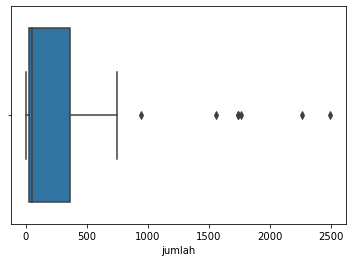

In [177]:
sns.boxplot(data = rekap_segmentasi, x=rekap_segmentasi['jumlah'])

540.75
54.0


<AxesSubplot:xlabel='jumlah'>

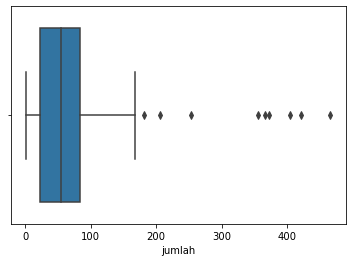

In [178]:
batas_atas = rekap_segmentasi['jumlah'].quantile(q = 0.75) * 1.5
median = rekap_segmentasi['jumlah'].median()
print(batas_atas)
print(median)
rekap_segmentasi.loc[rekap_segmentasi['jumlah'] > batas_atas, 'jumlah'] = median
sns.boxplot(data = rekap_segmentasi, x=rekap_segmentasi['jumlah'])

126.0
54.0


<AxesSubplot:xlabel='jumlah'>

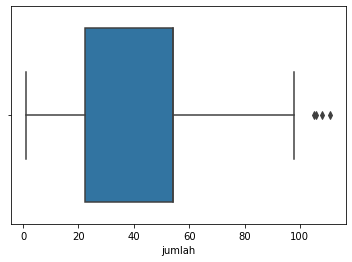

In [179]:
batas_atas = rekap_segmentasi['jumlah'].quantile(q = 0.75) * 1.5
median = rekap_segmentasi['jumlah'].median()
print(batas_atas)
print(median)
rekap_segmentasi.loc[rekap_segmentasi['jumlah'] > batas_atas, 'jumlah'] = median
sns.boxplot(data = rekap_segmentasi, x=rekap_segmentasi['jumlah'])

81.0
54.0


<AxesSubplot:xlabel='jumlah'>

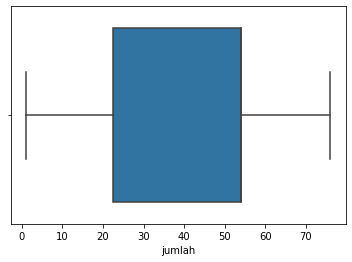

In [180]:
batas_atas = rekap_segmentasi['jumlah'].quantile(q = 0.75) * 1.5
median = rekap_segmentasi['jumlah'].median()
print(batas_atas)
print(median)
rekap_segmentasi.loc[rekap_segmentasi['jumlah'] > batas_atas, 'jumlah'] = median
sns.boxplot(data = rekap_segmentasi, x=rekap_segmentasi['jumlah'])

#data rekap_segmentasi perlu dilakukan penanganan outlier berulang agar benar benar menghilangkan seluruh outliernya

data 1 (jumlah_pembelian)

<AxesSubplot:xlabel='jumlah_pembelian'>

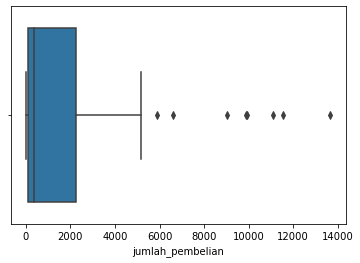

In [14]:
sns.boxplot(data = data1, x=data1['jumlah_pembelian'])

<AxesSubplot:xlabel='jumlah_pembelian'>

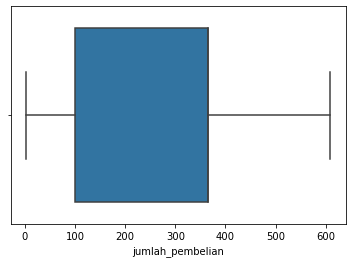

In [20]:
batas_atas = data1['jumlah_pembelian'].quantile(q = 0.75) * 1.5
median = data1['jumlah_pembelian'].median()
# print(batas_atas)
# print(median)
data1.loc[data1['jumlah_pembelian'] > batas_atas, 'jumlah_pembelian'] = median
sns.boxplot(data = data1, x=data1['jumlah_pembelian'])

data 3 (hubungan waktu dengan rerata skor)

<AxesSubplot:xlabel='rerata_skor'>

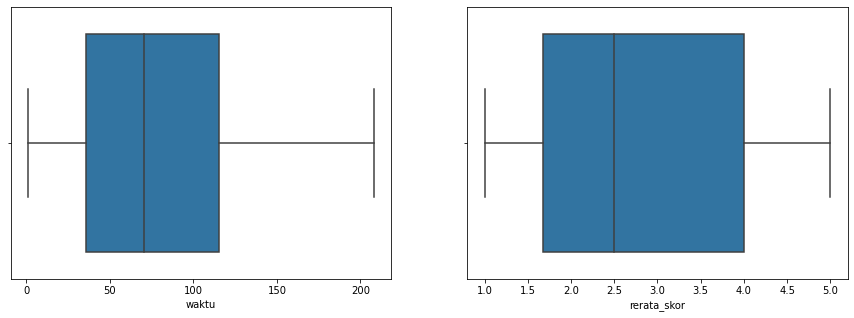

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


sns.boxplot(ax=ax[0], data = data4, x=data4['waktu'])
sns.boxplot(ax=ax[1], data = data4, x=data4['rerata_skor'])

In [190]:
rekap_segmentasi
rekap_segmentasi.to_csv('data21_olah.csv', index=False)

# INCONSISTENT

In [201]:
#memeriksa potensi data inkonsisten di data1 kolom nama produk

print(data1["product_name"].to_string())

0                              bed_bath_table
1                             furniture_decor
2                               health_beauty
3                              sports_leisure
4                       computers_accessories
5                                  housewares
6                               watches_gifts
7                                garden_tools
8                                   telephony
9                                        auto
10                                       toys
11                                 cool_stuff
12                                  perfumery
13                                       baby
14                                electronics
15                                 stationery
16                           office_furniture
17                                   pet_shop
18                   fashion_bags_accessories
19                                        NaN
20            construction_tools_construction
21                             con

In [30]:
map_inkonsisten = {
    'home_appliances_2': 'home_appliances',
    'home_confort': 'home_comfort',
    'home_comfort_2': 'home_comfort'
}

In [168]:
data1["product_name"].replace(map_inkonsisten)
data1["product_name"] = data1["product_name"].replace(map_inkonsisten)
print(data1["product_name"].to_string())

0                              bed_bath_table
1                             furniture_decor
2                               health_beauty
3                              sports_leisure
4                       computers_accessories
5                                  housewares
6                               watches_gifts
7                                garden_tools
8                                   telephony
9                                        auto
10                                       toys
11                                 cool_stuff
12                                  perfumery
13                                       baby
14                                electronics
15                                 stationery
16                           office_furniture
17                                   pet_shop
18                   fashion_bags_accessories
20            construction_tools_construction
21                             consoles_games
22                        luggage_

In [169]:
data1

,product_name,jumlah_pembelian
0,bed_bath_table,365
1,furniture_decor,365
2,health_beauty,365
3,sports_leisure,365
4,computers_accessories,365
...,...,...
67,arts_and_craftmanship,26
68,la_cuisine,16
69,cds_dvds_musicals,16
70,fashion_childrens_clothes,8


In [170]:
data1.to_csv('data1_olah.csv', index=False)

In [191]:
data4.to_csv('data4_olah.csv', index=False)

In [192]:
rekap_segmentasi

,kota,barang,jumlah
0,sao paulo,agro_industry_and_commerce,52
1,rio de janeiro,air_conditioning,50
2,sao paulo,art,34
3,diadema,arts_and_craftmanship,3
4,sao paulo,audio,66
...,...,...,...
66,sao paulo,stationery,54
67,sao paulo,tablets_printing_image,10
68,sao paulo,telephony,54
69,sao paulo,toys,54
